For molecules, one of the most important chemical informatic tools is rdkit. Rdkit is package developed under c language, but it has a wrapper for python, thus we can use it easily in python by installing the rdkit package in our environment. It contains three most important objects (i.e., special data structures.) molecule object, atom object and bond object. The details of each of them will be explained in following sections. But firstly let us install rdkit

This is a simple line to install rdkit via conda intall. In ipynb notebook, you got the magic ! to execute terminal shell commands. This is much more convenient.
One need to use os package to do this in py python files. The --yes is to automatically answer yes otherwise you can not type answer in this notebook but can use only the terminal

In [1]:
!conda install --yes -c conda-forge rdkit


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/lijiali/anaconda3/envs/Tutorial

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bzip2-1.0.8                |       h7f98852_4         484 KB  conda-forge
    freetype-2.10.4            |       h0708190_1         890 KB  conda-forge
    jpeg-9e                    |       h7f8727e_0         240 KB
    libiconv-1.16              |       h516909a_0         1.4 MB  conda-forge
    libpng-1.6.37              |       h21135ba_2         306 KB  conda-forge
    libtiff-4.0.10             |    hc3755c2_1005         602 KB  conda-forge
    libxml2-2.9.10             |       h68273f3_2         1.3 MB  con

This is the line to import the rdkit package. What means by import is to use specific codes written by others. Developers have written codes have different functions. They are now downloaded by you, then by using import we can get access to these codes written by them

In [2]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem

The next block is to create a molecule object from smiles. Smiles is one of many text-based representation of molecules. Simplified Molecular Input Line Entry System (SMILES), which is developed in 1988 by Weininger et al is the most widely used form for text-based representation of molecules in machine learning for material discovery.
However, it is important to notice that actually the smiles are generated from a molecule graph. And a molecule object in rdkit is strangely without documentation. What I can find is the ROMOL and RWMOL means a fixed molecule and a molecule that can be edited respectively. From these two documents and the methods of molecule object, the molecule object should contain a list of atom objects and a list of bond objects. It is not clear how the connectivity is stored in this object. One may can infer the structure by looking at the connection table format: https://chem.libretexts.org/Courses/University_of_Arkansas_Little_Rock/ChemInformatics_(2017)%3A_Chem_4399_5399/2.2%3A_Chemical_Representations_on_Computer%3A_Part_II/2.2.2%3A_Anatomy_of_a_MOL_file. However, the connectivity may just be an adjacent matrix as well which is in detailed in the paper: Crystals vs Molecules: Representation, Prediction and Inverse Design.

In [3]:
smi='CC(C)OC(=O)C(C)NP(=O)(OCC1C(C(C(O1)N2C=CC(=O)NC2=O)(C)F)O)OC3=CC=CC=C3'
mol = Chem.MolFromSmiles(smi)
print(mol)

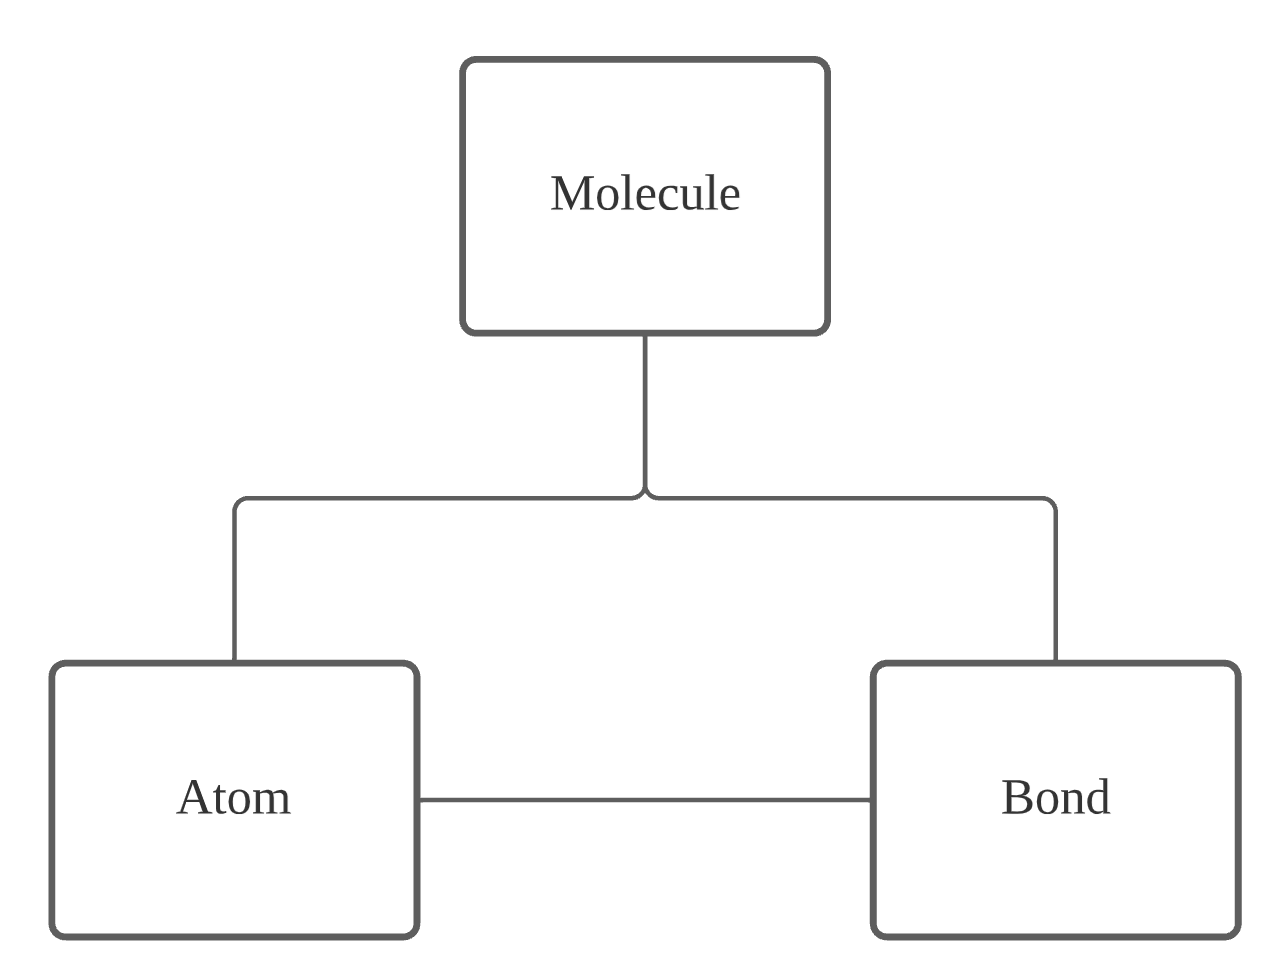


We can retrive the atoms and bonds objects from the mol objects by utilizing several developed methods for mol objects. However, we can not directly assess the attributes of mol objects. I think it is because all important objects such as mol, atoms or bonds are written with private variables. We can only assess them or modify them by using the methods of the particular objects in rdkit. This will make the objects to be more robust to use. In addition, it is difficult to inspect into rdkit objects, the reason may root from they are actually written in C and python is only the wrapper.

By looking at the next block, one can also conclude that for a particular object, there is a iterable sequence object for it in rdkit. Which can generally be treated as a list. 

In [4]:
Atoms = mol.GetAtoms() # This can return a sequence of atoms, which is a iterable object like list. One can access it by index
print(type(Atoms))
print(Atoms[0])#This will return the first Atom object
Bonds = mol.GetBonds()
print(type(Bonds))
print(Bonds[0])
mol.GetNumAtoms() # return the number of atoms in the mol object and print it.
# one can get the atoms or the bond objects by using index as well.
print(mol.GetAtomWithIdx(0))
print(mol.GetBondWithIdx(0))
print(mol.GetBondBetweenAtoms(0,1))
AAtoms = mol.GetAromaticAtoms()
print(mol.GetAromaticAtoms())
print((AAtoms[1]))

<class 'rdkit.Chem.rdchem._ROAtomSeq'>
<class 'rdkit.Chem.rdchem._ROBondSeq'>


Now let us look into details of the atom object. Various properties can be retrive by using the methods in the atom objects including the neighbor atoms (which is very useful when constructing the molecule graph) the list of properties and information that can be retrived is listed in the link: https://www.rdkit.org/docs/cppapi/classRDKit_1_1Atom.html . In addition, there are many methods that can be used to set the properties which can be quite useful as well.

In [5]:
print(Atoms[0].GetNeighbors())
print(Atoms[0].GetIdx())
print(Atoms[0].GetAtomMapNum())
print(Atoms[0].GetAtomicNum())
Atoms[0].SetAtomMapNum(2)
print(Atoms[0].GetIdx())
print(Atoms[0].GetAtomMapNum())
Atoms[0].SetAtomMapNum(0)

(<rdkit.Chem.rdchem.Atom object at 0x7f9c4d75c5e0>,)
0
0
6
0
2


After the atom objects, we can then look into the bond objects. For bond objects, it is similar to atom objects which have a number of methods that can get the properties and set the properties. The detailed list is in the link: https://www.rdkit.org/docs/cppapi/classRDKit_1_1Bond.html. It is interesting to notice that, the bond object can retrive the molecule object owns it and the atom object at the begin of the bond and end of the bond. This means the three main objects, mol, atoms, and bonds are related to each other closely in the implementation of rdkit.

In [11]:
print(Bonds[0].GetBeginAtomIdx())
print(Bonds[0].GetEndAtomIdx())
print(Bonds[0].GetBeginAtom())
print(Bonds[0].GetEndAtom())
print(Bonds[0].GetOwningMol())
print(Bonds[0].GetBondType())
Bonds[0].SetBondType(rdkit.Chem.rdchem.BondType.DOUBLE)
print(Bonds[0].GetBondType())
Bonds[0].SetBondType(rdkit.Chem.rdchem.BondType.SINGLE)


0
1
SINGLE
DOUBLE
['#', ')', '(', '+', '-', '/', '1', '3', '2', '5', '4', '7', '6', '8', '=', '@', 'C', 'B', 'F', 'I', 'H', 'O', 'N', 'S', '[', ']', '\\', 'c', 'l', 'o', 'n', 'p', 's', 'r']


After we have been familiar with the mol, atom and bond objects, we already have enough information on hands. The information we have includes the information of each atom's property each bond's property and the connectivity of atoms and bonds. In addition, we have seen that from the smiles text, we can extract all the information mentioned above. This means that the smiles text-based representation itself already contain all the information we needed for connectivity and the atoms and bonds. According to the sequence of the paper:  Crystals vs Molecules: Representation, Prediction and Inverse Design. We will firstly introduce the featurization of text-based representations. Firstly two different tokenization methods and one hot encoding methods will be introduced. One is used in molecular transformer,the molecular transformer mainly used the package ONMT for machine translation. In order to use ONMT, one need to have the tokenized dataset first. This is why they only do tokenization instead of constructing the features by their own. One is used by the deepchem package, which is better to learn as you can see how is a string and a mol object is encoded by one-hot encoding. From the results one can see that the row dimension will be same as the length of smiles string (or actually a max_len) and the column dimension is roughly the same as the number of possible tokens. This form will be easily to input to a sequence model such as RNN, LSTM, and GRU. We will go through the models in the forward prediction part. For the one-hot-encoding in deepchem it is set to 100 max len. However when during the training of models, it may be better to have a varied max len for each batch of training data for sequential model.

In [87]:
import logging
import numpy as np
from typing import List, Union, Tuple
from typing import Any, Iterable, Optional
logger = logging.getLogger(__name__)
def smi_tokenizer(smi):
    """
    Tokenize a SMILES molecule or reaction. This is the tokenizer used for molecular transformer
    It is aiming to get the smiles into tokens. SMILES is a list containing different symbols. If we want 
    to use them, normally will first try to make a list into separated symbols.
    """
    import re
    pattern =  "(\[[^\]]+]|Br?|Cl?|N|O|S|P|F|I|b|c|n|o|s|p|\(|\)|\.|=|#|-|\+|\\\\|\/|:|~|@|\?|>|\*|\$|\%[0-9]{2}|[0-9])"
    regex = re.compile(pattern)
    tokens = [token for token in regex.findall(smi)]
    assert smi == ''.join(tokens)
    return ' '.join(tokens)


Symbol_set = [
    '#', ')', '(', '+', '-', '/', '1', '3', '2', '5', '4', '7', '6', '8', '=',
    '@', 'C', 'B', 'F', 'I', 'H', 'O', 'N', 'S', '[', ']', '\\', 'c', 'l', 'o',
    'n', 'p', 's', 'r'
]
smi='CC(C)OC(=O)C(C)NP(=O)(OCC1C(C(C(O1)N2C=CC(=O)NC2=O)(C)F)O)OC3=CC=CC=C3'

token_list=smi_tokenizer(smi)
print(token_list)
print(len(token_list))


def one_hot_encode(val: Union[int, str],
                   allowable_set: Union[List[str], List[int]],
                   include_unknown_set: bool = False) -> List[float]:
    """
    One hot encoder for elements of a provided set.
    Examples
    --------
    >>> one_hot_encode("a", ["a", "b", "c"])
    [1.0, 0.0, 0.0]
    >>> one_hot_encode(2, [0, 1, 2])
    [0.0, 0.0, 1.0]
    >>> one_hot_encode(3, [0, 1, 2])
    [0.0, 0.0, 0.0]
    >>> one_hot_encode(3, [0, 1, 2], True)
    [0.0, 0.0, 0.0, 1.0]
    Parameters
    ----------
    val: int or str
    The value must be present in `allowable_set`.
    allowable_set: List[int] or List[str]
    List of allowable quantities.
    include_unknown_set: bool, default False
    If true, the index of all values not in `allowable_set` is `len(allowable_set)`.
    Returns
    -------
    List[float]
    An one-hot vector of val.
    If `include_unknown_set` is False, the length is `len(allowable_set)`.
    If `include_unknown_set` is True, the length is `len(allowable_set) + 1`.
    Raises
    ------
    ValueError
    If include_unknown_set is False and `val` is not in `allowable_set`.
    """

    if include_unknown_set is False:

        if val not in allowable_set:
            logger.info("input {0} not in allowable set {1}:".format(
                val, allowable_set))

    # init an one-hot vector
    if include_unknown_set is False:

        one_hot_legnth = len(allowable_set)
    else:

        one_hot_legnth = len(allowable_set) + 1

    '''
    It will initiate a list with 0 first. The len of the list should be the same as 
    the allowable_set or allowable_set + 1
    '''
    one_hot = [0.0 for _ in range(one_hot_legnth)]

    try:

        '''
        The method list.index is used. The index is a search method. It can search the position 
        of the element under search. The element can be a int, a float or a str. For example 
        we can search for 'C' the carbon element in the allowable set. 
        '''
        one_hot[allowable_set.index(val)] = 1.0  # type: ignore
    except:

        if include_unknown_set:
    # If include_unknown_set is True, set the last index is 1.
            one_hot[-1] = 1.0

        else:
            pass
    return one_hot

class OneHotFeaturizer():
    '''
    This is the implementation by deepchem onehot encoder
    The way deepchem implement the classes are very formal which means they
    have defined the type of input and returns. This is kind of advanced level of writing a class
    one can ignore the : type in terms of easier understanding. For example can just understand like
    max_length=100
    '''

    def __init__(self,
                 symbol_set: List[str] = Symbol_set,
                 max_length: Optional[int] = 100):
        if len(symbol_set) != len(set(symbol_set)):
            raise ValueError("All values in symbol_set must be unique.")
        self.symbol_set = symbol_set
        self.max_length = Optional[int]

        if max_length is not None:
            self.max_length = int(max_length)
        else:
            self.max_length = None

    def featurize(self,
                  datapoints: Iterable[Any],
                  log_every_n: int = 1000,
                  **kwargs) -> np.ndarray:
        

        """Featurize strings or mols.
        Parameters
        ----------
        datapoints: list
          A list of either strings (str or numpy.str_) or RDKit molecules.
        log_every_n: int, optional (default 1000)
          How many elements are featurized every time a featurization is logged.
        """
        datapoints = list(datapoints)
        if (len(datapoints) < 1):
            return np.array([])
        features = []
        for i, point in enumerate(datapoints):
            '''
            By using the enumerate function, for the list of data points. It will generate 
            an idx for every datapoint
            '''
            if i % log_every_n == 0:
                logger.info("Featurizing datapoint %i" % i)
            try:
                '''
                Try is a special language that will make the function to try something first
                if fail which means an error is raising they will do something in the except.
                '''
                features.append(self._featurize(point, **kwargs))
    
            except:
                logger.warning(
                    "Failed to featurize datapoint %d. Appending empty array")
                features.append(np.array([]))
                '''
                The features are list form and for easier usage afterwards
                we will convert them into numpy array
                '''
        return np.asarray(features)


    def _featurize(self, datapoint: Any, **kwargs):
        '''
        The leading underscore means it is a private method
        It basically try to see what is the type of the data in the datapoints list
        If it is a string which is a smiles in our case, then use another method
        called featurize string. If it is a mol then use featurize mol
        '''
        # Featurize str data
        if isinstance(datapoint, (str, np.str_)):
            return self._featurize_string(datapoint)
        # Featurize mol data
        else:
            return self._featurize_mol(datapoint)


    def pad_string(self, string: str) -> str:
        """Pad string to `self.pad_length`
        Parameters
        ----------
        string: str
        The string to be padded.
        Returns
        -------
        str
        String space padded to self.pad_length
        """


        '''
        The way how deepchem do the one hot encoding with padding is by adding space at the trail of smile
        string. This is done by the string method ljust in python. The input is the len of the returned string
        '''
        if isinstance(self.max_length, int):
            return string.ljust(self.max_length)
        else:
            return string


    def _featurize_string(self, string: str) -> np.ndarray:
        """
        Compute one-hot featurization of string.
        Parameters
        ----------
        string: str
          An arbitrary string to be featurized.
        Returns
        -------
        np.ndarray
          An one hot vector encoded from arbitrary input string.
          The shape is `(max_length, len(Symbol_set) + 1)`.
          The index of unknown character is `len(charset)`.
        """


        if isinstance(self.max_length, int):
            if (len(string) > self.max_length):  # Validation
                raise ValueError("The length of {} is longer than `max_length`.")
        string = self.pad_string(string)  # Padding
        print(string)
        return np.array([
            one_hot_encode(val, self.symbol_set, include_unknown_set=True)
            for val in string
        ])


    def _featurize_mol(self, mol) -> np.ndarray:
        """
        Compute one-hot featurization of this molecule.
        Parameters
        ----------
        mol: rdKit.Chem.rdchem.Mol
        RDKit Mol object
        Returns
        -------
        np.ndarray
        An one hot vector encoded from SMILES.
        The shape is '(max_length, len(charset) + 1)'
        The index of unknown character is 'len(charset)'.
        """


        '''
        The deepchem actually do the one-hot encoding of mol by converting it into smiles 
        string first. This is reasonable. Since one will think about one hot encode a molecule 
        via element and bonds.
        '''
        try:
            from rdkit import Chem
        except ModuleNotFoundError:
            raise ImportError("This class requires RDKit to be installed.")
        smiles = Chem.MolToSmiles(mol)  # Convert mol to SMILES string.
        return self._featurize_string(smiles)  # Use string featurization.


    def untransform(self, one_hot_vectors: np.ndarray) -> str:
        """Convert from one hot representation back to original string
        Parameters
        ----------
        one_hot_vectors: np.ndarray
          An array of one hot encoded features.
        Returns
        -------
        str
          Original string for an one hot encoded array.
        """


        string = ""
        for one_hot in one_hot_vectors:
            try:
                idx = np.argmax(one_hot)
                string += self.symbol_set[idx]
            except IndexError:
                string += ""
        return string


featurizer = OneHotFeaturizer()

smiles = ['CCC']
                                                    
encodings = featurizer.featurize(smiles)
'''
The encodings shape will be a matrix with three different dimensions. 
[number_of_datapoints, the defined max length of string, the allowable set length +1(since it is set to True to include the padding)]
'''

print(encodings.shape)



C C ( C ) O C ( = O ) C ( C ) N P ( = O ) ( O C C 1 C ( C ( C ( O 1 ) N 2 C = C C ( = O ) N C 2 = O ) ( C ) F ) O ) O C 3 = C C = C C = C 3
139
CCC                                                                                                 
(1, 100, 35)


As we can see for the one hot encoding featurizer, one of the problem is it has too many zeros which makes the representation of a single molecule to be a big matrix. Sometimes this can cause problem, especially when someone is using a big dataset. If a big dataset is used then the memory may not be enough to take in all the data. For example when one want to use popular package like chemprop or deepchem to predict on a large dataset such as the zinc dataset with more than millions of molecules, the memory can get overflow since it will need to hold all the smiles and transform them into matrix. One way to optimize the memory usage is to turn the dense matrix into sparse ones. Another way is to make big dataset into small chunks then run, this will be visited in the forward prediction section

In [32]:
import logging
from typing import List
import numpy as np
import scipy
from typing import Any, Iterable
logger = logging.getLogger(__name__)
CHARSET = [
    '#', ')', '(', '+', '-', '/', '1', '3', '2', '5', '4', '7', '6', '8', '=',
    '@', 'C', 'B', 'F', 'I', 'H', 'O', 'N', 'S', '[', ']', '\\', 'c', 'l', 'o',
    'n', 'p', 's', 'r'
]

class SparseMatrixOneHotFeaturizer():
  """Encodes any arbitrary string as a one-hot array.
  This featurizer uses the sklearn OneHotEncoder to create
  sparse matrix representation of a one-hot array of any string.
  It is expected to be used in large datasets that produces memory overload
  using standard featurizer such as OneHotFeaturizer. For example: SwissprotDataset

  """

  def __init__(self, charset: List[str] = CHARSET):
    """Initialize featurizer.
    Parameters
    ----------
    charset: List[str] (default code)
      A list of strings, where each string is length 1 and unique.
    """
    if len(charset) != len(set(charset)):
      raise ValueError("All values in charset must be unique.")
    self.charset = charset
    from sklearn.preprocessing import OneHotEncoder
    cat = np.array(self.charset).reshape(1, len(self.charset))
    self.ohe = OneHotEncoder(categories=list(cat), handle_unknown='ignore')
    #unknown char will lead to a column with all zeros
  def featurize(self,
                datapoints: Iterable[Any],
                log_every_n: int = 1000,
                **kwargs) -> np.ndarray:

    """Featurize strings or mols.
    Parameters
    ----------
    datapoints: list
      A list of either strings (str or numpy.str_) or RDKit molecules.
    log_every_n: int, optional (default 1000)
      How many elements are featurized every time a featurization is logged.
    """
    datapoints = list(datapoints)
    if (len(datapoints) < 1):
      return np.array([])
    features = []
    for i, point in enumerate(datapoints):
      '''
      By using the enumerate function, for the list of data points. It will generate 
      an idx for every datapoint
      '''
      if i % log_every_n == 0:
        logger.info("Featurizing datapoint %i" % i)
      try:
        '''
        Try is a special language that will make the function to try something first
        if fail which means an error is raising they will do something in the except.
        '''
        features.append(self._featurize(point, **kwargs))

      except:
        logger.warning(
          "Failed to featurize datapoint %d. Appending empty array")
        features.append(np.array([]))
        '''
        The features are list form and for easier usage afterwards
        we will convert them into numpy array
        '''
    return np.asarray(features)

  def _featurize(self, datapoint: Any, **kwargs):
    """ 
    It is a private method to be used by public featurize method
    Parameters
    ----------
    datapoint : list of string
        string to be converted to a sparse one hot matrix.
    Returns
    -------
    scipy sparse matrix
      A scipy sparse matrix of the one hot representation of the given string.
    """
    # Featurize str data
    if isinstance(datapoint, (str, np.str_)):
      sequence = np.array(list(datapoint)).reshape(-1, 1)
    #list(str) will split a string into a list of char
      sparse_mat = self.ohe.fit_transform(sequence)
      return sparse_mat
    else:
      raise ValueError("Datapoint is not a string")

  def untransform(self, one_hot_vectors) -> str:
    """Convert from one hot representation back to original string
    Parameters
    ----------
    one_hot_vectors: np.ndarray
      An array of one hot encoded features.
    Returns
    -------
    str
      Original string for an one hot encoded array.
    """
    string = ""
    invers_trans = self.ohe.inverse_transform(one_hot_vectors)
    for one_hot in invers_trans:
      string += one_hot[0]
    return string

featurizer = SparseMatrixOneHotFeaturizer()

smiles = ['CCC']
                                                    
encodings = featurizer.featurize(smiles)
print(list('CCC'))
print(np.array(list('CCC')).reshape(-1,1))
print(encodings.shape)
print(encodings[0])
print(encodings[0].shape)



['C', 'C', 'C']
[['C']
 ['C']
 ['C']]
(1,)
  (0, 16)	1.0
  (1, 16)	1.0
  (2, 16)	1.0
(3, 34)


There are a few extensions of the one-hot encoding of the smiles text representations. For example for the paper: "SMILES2vec
An Interpretable General-Purpose Deep Neural Network for Predicting Chemical Properties". It used a special version of one-hot encoding of the smiles as follow block. The shape actually is different than the one hot enconding above, so it is more memory efficient. Actually it use an idx for a symbol instead of a one hot vector. As a result to represent a single molecule, it only need a one dimension list, and one hot encoder need a two-dimension matrix. However it is different from word2vec which used unsupervised learning thus the vocabulary has similar meaning will be closer.

In [17]:
from typing import Dict, List
import numpy as np
import pandas as pd
PAD_TOKEN = "<pad>"
OUT_OF_VOCAB_TOKEN = "<unk>"

filename = "./Photosensitizers_DA.csv"
def create_char_to_idx(filename: str,
                       max_len: int = 250,
                       smiles_field: str = "smiles") -> Dict[str, int]:
  """Creates a dictionary with character to index mapping.
  The input is a dataframe, it will search through the data frame to get
  the Symbol_set as used for the one_hot_encoder
  Good thing is it can include all chars for the training data, add
  unknown is to avoid there is unknown char in testing case
  Parameters
  ----------
  max_len: int, default 250
      Maximum allowed length of the SMILES string
  smiles_field: str, default "smiles"
      Field indicating the SMILES strings int the file.
  Returns
  -------
  Dict[str, int]
    A dictionary mapping characters to their integer indexes.
  """
  smiles_df = pd.read_csv(filename)
  char_set = set()
  for smile in smiles_df[smiles_field]:
    if len(smile) <= max_len:
      char_set.update(set(smile))#use set can get the unique char from a string

  unique_char_list = list(char_set)
  unique_char_list += [PAD_TOKEN, OUT_OF_VOCAB_TOKEN]
  char_to_idx = {letter: idx for idx, letter in enumerate(unique_char_list)}
  return char_to_idx

char_to_idx = create_char_to_idx(filename=filename, smiles_field='SMILES')
print(char_to_idx)

class SmilesToSeq():
  """
  SmilesToSeq Featurizer takes a SMILES string, and turns it into a sequence.
  Details taken from [1]_.
  SMILES strings smaller than a specified max length (max_len) are padded using
  the PAD token while those larger than the max length are not considered. Based
  on the paper, there is also the option to add extra padding (pad_len) on both
  sides of the string after length normalization (means pad to max_len). Using a character to index (char_to_idx)
  mapping, the SMILES characters are turned into indices and the
  resulting sequence of indices serves as the input for an embedding layer.
  References
  ----------
  .. [1] Goh, Garrett B., et al.
  "Smiles2vec: An interpretable general-purpose deep neural network for predicting chemical properties."
  arXiv preprint arXiv:1712.02034 (2017).
  Note
  ----
  This class requires RDKit to be installed.
  """

  def __init__(self,
               char_to_idx: Dict[str, int],
               max_len: int = 250,
               pad_len: int = 10):
    """Initialize this class.
    Parameters
    ----------
    char_to_idx: Dict
      Dictionary containing character to index mappings for unique characters
    max_len: int, default 250
      Maximum allowed length of the SMILES string.
    pad_len: int, default 10
      Amount of padding to add on either side of the SMILES seq
    """
    self.max_len = max_len
    self.char_to_idx = char_to_idx
    self.idx_to_char = {idx: letter for letter, idx in self.char_to_idx.items()}
    self.pad_len = pad_len

  def to_seq(self, smile: List[str]) -> np.ndarray:
    """Turns list of smiles characters into array of indices"""
    out_of_vocab_idx = self.char_to_idx[OUT_OF_VOCAB_TOKEN]
    seq = [
        self.char_to_idx.get(character, out_of_vocab_idx) for character in smile
    ] # if character is unknown, the value will be the out of vocab idx
    return np.array(seq)

  def remove_pad(self, characters: List[str]) -> List[str]:
    """Removes PAD_TOKEN from the character list."""
    characters = characters[self.pad_len:]
    characters = characters[:-self.pad_len]
    chars = list()

    for char in characters:
      if char != PAD_TOKEN:
        chars.append(char)
    return chars

  def smiles_from_seq(self, seq: List[int]) -> str:
    """Reconstructs SMILES string from sequence."""
    characters = [self.idx_to_char[i] for i in seq]

    characters = self.remove_pad(characters)
    smile = "".join([letter for letter in characters])
    return smile

  def featurize(self, datapoint, is_mol=False, **kwargs) -> np.ndarray:
    """Featurizes a SMILES sequence.
    Parameters
    ----------
    datapoints: rdkit.Chem.rdchem.Mol
      RDKit Mol object
    Returns
    -------
    np.ndarray
      A 1D array of a SMILES sequence.
      If the length of SMILES is longer than `max_len`, this value is an empty array.
    """
    try:
      from rdkit import Chem
    except ModuleNotFoundError:
      raise ImportError("This class requires RDKit to be installed.")

    if 'mol' in kwargs:
      datapoint = kwargs.get("mol")
      raise DeprecationWarning(
          'Mol is being phased out as a parameter, please pass "datapoint" instead.'
      )
    if is_mol:
      smile = Chem.MolToSmiles(datapoint)
    else:
      smile = datapointhttps://www.google.com/search?channel=fs&client=ubuntu&q=+Chem.Mol
    if len(smile) > self.max_len:
      return np.array([])

    smile_list = list(smile)
    # Extend shorter strings with padding
    if len(smile) < self.max_len:
      smile_list.extend([PAD_TOKEN] * (self.max_len - len(smile)))

    # Padding before and after
    smile_list += [PAD_TOKEN] * self.pad_len
    smile_list = [PAD_TOKEN] * self.pad_len + smile_list

    smile_seq = self.to_seq(smile_list)
    return smile_seq

smiles = 'c1cnc2c(c1)[SiH2:2]c1cc(-n3ccc4ccccc43)cnc1'
featurizer = SmilesToSeq(char_to_idx)
encodings = featurizer.featurize(smiles)
print(encodings.shape)
print(encodings)


{'P': 0, '#': 1, 'O': 2, '7': 3, '-': 4, 'o': 5, '8': 6, 'n': 7, ')': 8, '3': 9, 'i': 10, 'S': 11, '2': 12, 'F': 13, '5': 14, ':': 15, '(': 16, ']': 17, '9': 18, 'H': 19, '1': 20, '4': 21, '=': 22, 'N': 23, 's': 24, '[': 25, 'c': 26, 'C': 27, '6': 28, '<pad>': 29, '<unk>': 30}
(270,)
[29 29 29 29 29 29 29 29 29 29 26 20 26  7 26 12 26 16 26 20  8 25 11 10
 19 12 15 12 17 26 20 26 26 16  4  7  9 26 26 26 21 26 26 26 26 26 21  9
  8 26  7 26 20 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29
 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 29 

Another extension is a not popular one which is converting the smiles into images. This is the approach done by the paper "Using rule-based labels for weak supervised learning: a ChemNet for transferable chemical property prediction." By  turning the smiles text into image like matrix, CNN models can be applied. Actually the way it converts smiles or mol to image is not done by the drawing of the figures by using rdkit draw package. It is more like constructing a mol feature into a fixed size matrix. Inside the matrix the relative and absolute positions of bonds and atoms are encoded. In addition, the property information of bonds and atoms are also represented at the corresponding positions. By creating this matrix, one can use CNN to learn representations. Although there will still be a lot of zero in the matrix representation, thus the useful information inside the matrix is not easy to extract

In [83]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import logging
from typing import Dict, List, Any


class SmilesToImage():
  """Convert SMILES string to an image.
  SmilesToImage Featurizer takes a SMILES string, and turns it into an image.
  Details taken from [1]_.
  The default size of for the image is 80 x 80. Two image modes are currently
  supported - std & engd. std is the gray scale specification,
  with atomic numbers as pixel values for atom positions and a constant value of
  2 for bond positions. engd is a 4-channel specification, which uses atom
  properties like hybridization, valency, charges in addition to atomic number.
  Bond type is also used for the bonds which means not fixed to 2 but with two significant numbers
   (e.g. SINGLE->1.0, AROMATIC->1.5, etc.).
  The coordinates of all atoms are computed, and lines are drawn between atoms
  to indicate bonds. For the respective channels, the atom and bond positions are
  set to the property values as mentioned in the paper.
  """

  def __init__(self,
               img_size: int = 80,
               res: float = 0.5,
               max_len: int = 250,
               img_spec: str = "std"):
    """
    Parameters
    ----------
    img_size: int, default 80
      Size of the image tensor
    res: float, default 0.5
      Displays the resolution of each pixel in Angstrom
    max_len: int, default 250
      Maximum allowed length of SMILES string
    img_spec: str, default std
      Indicates the channel organization of the image tensor
    """
    if img_spec not in ["std", "engd"]:
      raise ValueError(
          "Image mode must be one of std or engd. {} is not supported".format(
              img_spec))

    self.img_size = img_size
    self.max_len = max_len
    self.res = res
    self.img_spec = img_spec
    self.embed = int(img_size * res / 2)

  def featurize(self,
                datapoints: Iterable[Any],
                log_every_n: int = 1000,
                **kwargs) -> np.ndarray:

    """Featurize strings or mols.
    Parameters
    ----------
    datapoints: list
      A list of either strings (str or numpy.str_) or RDKit molecules.
    log_every_n: int, optional (default 1000)
      How many elements are featurized every time a featurization is logged.
    """
    datapoints = list(datapoints)
    if (len(datapoints) < 1):
      return np.array([])
    features = []
    for i, point in enumerate(datapoints):
      '''
      By using the enumerate function, for the list of data points. It will generate 
      an idx for every datapoint
      '''
      if i % log_every_n == 0:
        logger.info("Featurizing datapoint %i" % i)
      try:
        '''
        Try is a special language that will make the function to try something first
        if fail which means an error is raising they will do something in the except.
        '''
        features.append(self._featurize(point, **kwargs))

      except:
        logger.warning(
          "Failed to featurize datapoint %d. Appending empty array")
        features.append(np.array([]))
        '''
        The features are list form and for easier usage afterwards
        we will convert them into numpy array
        '''
    return np.asarray(features)

  def _featurize(self, datapoint: Any, is_smile=False) -> np.ndarray:
    """Featurizes a single SMILE into an image.
    Parameters
    ----------
    datapoint: rdkit.Chem.rdchem.Mol
      RDKit Mol object
    Returns
    -------
    np.ndarray
      A 3D array of image, the shape is `(img_size, img_size, 1)`.
      If the length of SMILES is longer than `max_len`, this value is an empty array.
    """
    try:
      from rdkit import Chem
      from rdkit.Chem import AllChem
    except ModuleNotFoundError:
      raise ImportError("This class requires RDKit to be installed.")
    smile = Chem.MolToSmiles(datapoint)
    if len(smile) > self.max_len:
      return np.array([])
    '''
    Since it the original deepchem code then I will not change it
    It is a bit strange it converts to Binary then convert back. Maybe it is like a fast operation
    of converting the mol into smiles then back to sanitizer the mols. However, it does not use a 
    try and exception to deal with it, so maybe not intention for the sanitizer purpose. The Binary form can be 
    converted faster than a smiles form back to rdkit mol. I think it is more like to have a copy of the mol object
    for compute usage
    '''
    cmol = Chem.Mol(datapoint.ToBinary())
    print(cmol)
    '''
    The Gasteiger Charge is to calculated the atomic charge by using the model invented by Gasteiger
    '''
    cmol.ComputeGasteigerCharges()

    AllChem.Compute2DCoords(cmol)
    '''
    The atom_coords will have a shape of [number of atoms, 3] 3 is for x, y, z. since it is 2D then the z is 
    always 0
    '''
    atom_coords = cmol.GetConformer(0).GetPositions()

    if self.img_spec == "std":
      # Setup image
      img = np.zeros((self.img_size, self.img_size, 1))
      # Compute bond properties
      bond_props = np.array(
          [[2.0, bond.GetBeginAtomIdx(),
            bond.GetEndAtomIdx()] for bond in datapoint.GetBonds()])
      # Compute atom properties
      atom_props = np.array([[atom.GetAtomicNum()] for atom in cmol.GetAtoms()])

      bond_props = bond_props.astype(np.float32)
      atom_props = atom_props.astype(np.float32)

    else:
      # Setup image
      img = np.zeros((self.img_size, self.img_size, 4))
      # Compute bond properties
      '''
      The shape of bond_props will be (number of bonds, 3)
      '''
      bond_props = np.array([[
          bond.GetBondTypeAsDouble(), #returns our bondType as a double (e.g. SINGLE->1.0, AROMATIC->1.5, etc.)
          bond.GetBeginAtomIdx(),
          bond.GetEndAtomIdx()
      ] for bond in datapoint.GetBonds()])
      # Compute atom properties
      atom_props = np.array([[
          atom.GetAtomicNum(),
          atom.GetProp("_GasteigerCharge"),
          atom.GetExplicitValence(),
          atom.GetHybridization().real,
      ] for atom in cmol.GetAtoms()])

      bond_props = bond_props.astype(np.float32)
      atom_props = atom_props.astype(np.float32)

      partial_charges = atom_props[:, 1]
      if np.any(np.isnan(partial_charges)):
        return np.array([])

    frac = np.linspace(0, 1, int(1 / self.res * 2))
    '''
    When res = 0.5 which is default frac = [0. ,0.33333333, 0.66666667, 1.] shape is (4,)
    '''
    # Reshape done for proper broadcast
    '''
    After reshape it is (4,1,1) 
    [[[0.        ]]

    [[0.33333333]]

    [[0.66666667]]

    [[1.        ]]]
    '''
    frac = frac.reshape(-1, 1, 1)

    bond_begin_idxs = bond_props[:, 1].astype(int) # No matter which form of img, the second position is the bond begin idx
    bond_end_idxs = bond_props[:, 2].astype(int)

    # Reshapes, and axes manipulations to facilitate vector processing.
    begin_coords = atom_coords[bond_begin_idxs] #from the atom_coords matrix directly get the position of the atom
    '''The begin_coords will be (number of bonds, 3), after the transformation it will be (1, 3, number of bonds)'''
    begin_coords = np.expand_dims(begin_coords.T, axis=0)
    end_coords = atom_coords[bond_end_idxs]
    end_coords = np.expand_dims(end_coords.T, axis=0)

    # Draw a line between the two atoms.
    # The coordinates of this line, are indicated in line_coords
    '''
    This will give out a matrix with shape (4, 3, number of bonds), 4 comes from the default self.res
    It is trying to do a linear interpolation between the begin_coords and end_coords
    '''
    line_coords = frac * begin_coords + (1 - frac) * end_coords
    # Turn the line coordinates into image positions
    '''
    line_coors[:,0] means get all x coords and line_coors means get all y corrds
    The shape is (4, number of bonds)
    '''
    bond_line_idxs = np.ceil(
        (line_coords[:, 0] + self.embed) / self.res).astype(int)
    bond_line_idys = np.ceil(
        (line_coords[:, 1] + self.embed) / self.res).astype(int)
    # Turn atomic coordinates into image positions
    atom_idxs = np.round(
        (atom_coords[:, 0] + self.embed) / self.res).astype(int)
    atom_idys = np.round(
        (atom_coords[:, 1] + self.embed) / self.res).astype(int)

    try:
      # Set the bond line coordinates to the bond property used.
      '''
      This may be difficult to understand but one can read the following example to help understand:
      x = array([[ 0,  1,  2],
            [ 3,  4,  5],
            [ 6,  7,  8],
            [ 9, 10, 11]])
      rows = np.array([[0, 0],
                        [3, 3]], dtype=np.intp)
      columns = np.array([[0, 2],
                           [0, 2]], dtype=np.intp)
      x[rows, columns]
      output: array([[ 0,  2],
                    [ 9, 11]])
      '''
      img[bond_line_idxs, bond_line_idys, 0] = bond_props[:, 0]
      '''
      I think some of the bond position may overlap with atom one then be overwrite
      '''
      # Set the atom positions in image to different atomic properties in channels
      img[atom_idxs, atom_idys, :] = atom_props

    except IndexError:
      # With fixed res and img_size some molecules (e.g. long chains) may not fit.
      raise IndexError(
          "The molecule does not fit into the image. Consider increasing img_size or res of the SmilesToImage featurizer."
      )
    return img
datapoint= Chem.MolFromSmiles('CCC')
datapoint=[datapoint]
featurizer = SmilesToImage(img_spec='engd')
encodings = featurizer.featurize(datapoint)
print(encodings.shape)
print(encodings)

(1, 80, 80, 4)
[[[[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   ...
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   ...
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   ...
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  ...

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   ...
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   ...
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]

  [[0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   ...
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]
   [0. 0. 0. 0.]]]]


Now let us do a conclusion on the featurization of smile based text representation. Here Three main featurizers are discussed. The first one is the one hot encoding, second is sequence encoding, third one is smiles to img encoding. For the first one, one need to have a matrix to indicate a molecule, where each row represent a smile column, one way to improve the space efficiency is to use a sparse matrix. The topological connection is encoded in the sequence of the  symbols thus must encode the symbol one by one. For the second one is to encode a molecule by a one dimension list, it is just use a unique number to represent a symbol instead of using a one hot vector, this can save space, and may can be more efficient. The third one is the smile to img, where a molecule is represent by a tensor that has three dimensions. For this representation, one good thing is the actual coordinates are considered, however, the matrix is very sparse due to most of the pixels are zeros. This may lead to difficulities in learning. Although the absolute position information is used in this representation which might be good for learning as there are more information, this information actually can be calculated from the topological information of smiles. Thus it may not be that useful. It is not easy to say what kind of representation is the best representation, as specific representation may work better for specific tasks. We will try to look deeper for these questions for the forward prediction and inverse design sections.